<a href="https://colab.research.google.com/github/Shrivastav-Gaurav/GenAI-ML-Notebook/blob/main/Handwritten_Digit_Recognition_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition

This notebook demonstrates how to use PyTorch to build and train a simple neural network for handwritten digit recognition using the MNIST dataset.

The MNIST dataset contains 28x28 grayscale images of handwritten digits. The task is to classify each image into one of the 10 classes (0-9).

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png" alt="Example Image" style="width:300px;height:200px;">

### Necessary Imports

We will import the required libraries to handle data loading, transformations, model building, and training.


In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [2]:
import os
from google.colab import drive

### Download The Dataset & Define The Transforms

The MNIST dataset is available in torchvision. We will download it and define the necessary transformations to convert the images to tensors and normalize them.


In [3]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.07MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 65.4kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.15MB/s]


### Exploring The Data

Let's visualize some sample images from the dataset to understand what the data looks like.


In [4]:
type(trainloader)

torch.utils.data.dataloader.DataLoader

In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape) # X
print(labels.shape) # y

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


### numpy.squeeze
`squeeze()` can take a `3D` matrix and reduce it to a `2D` matrix if one of its dimensions is `1`.

If a `3D` matrix has a dimension of size `1`, `squeeze()` will remove that dimension, resulting in a `2D` matrix. This is often useful when you want to simplify operations or make the data compatible with functions that expect 2D matrices.  

A matrix of shape `(1, 28, 28)` is a 3-dimensional array with 1 layer, 28 rows, and 28 columns. It's essentially a single 28x28 matrix embedded within a larger `3D` structure.

A matrix of shape `(28, 28)` is a 2-dimensional array with 28 rows and 280 columns. It's a more common representation for a matrix, directly representing a table of values.



In [6]:
images[0].numpy().shape

(1, 28, 28)

In [7]:
images[0].numpy().squeeze().shape

(28, 28)

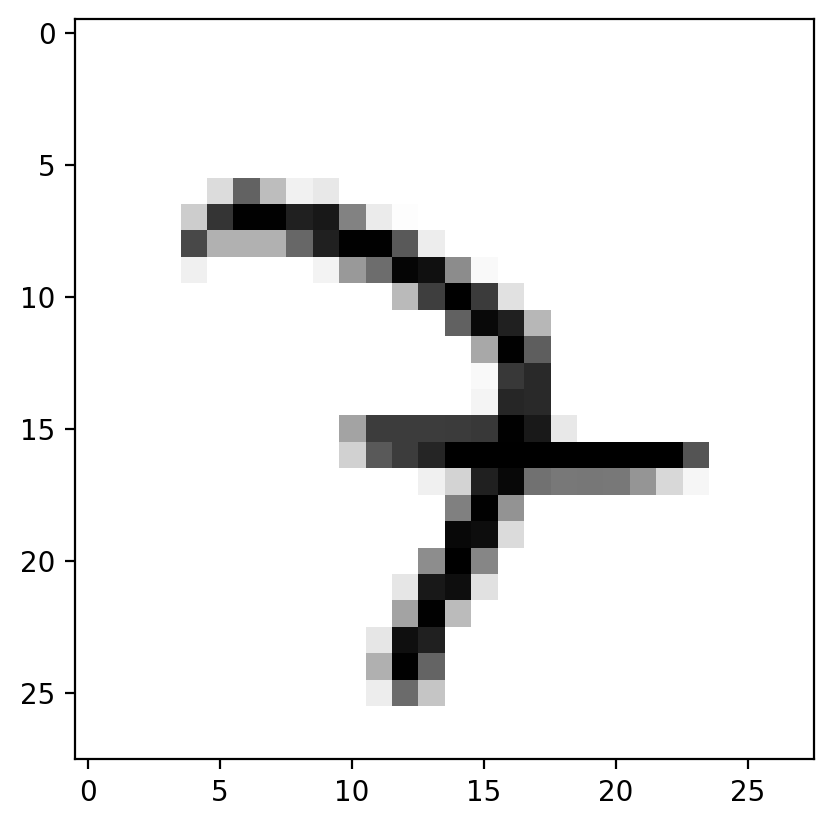

In [8]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

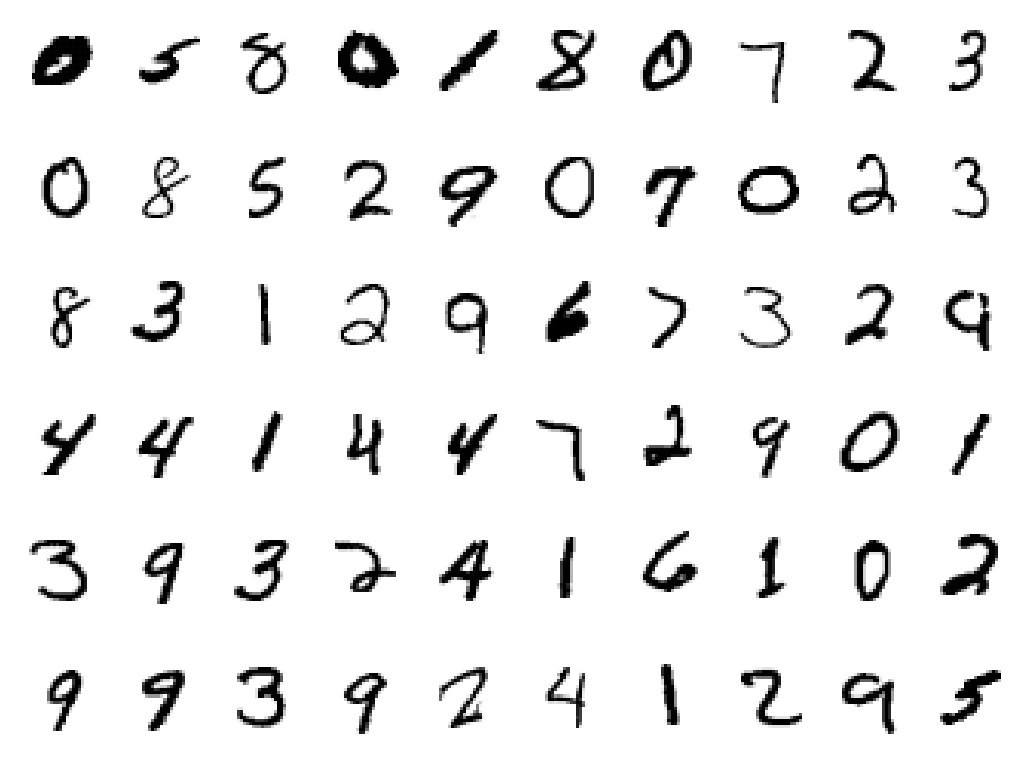

In [9]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

## Explaining the layers  

**Fully Connected Neural Network (FCNN)** architecture, commonly used for tasks like handwritten digit recognition.



#### **Input Layer:**

- **784 neurons:** This represents the flattened input image. For a 28x28 pixel image, 784 neurons are needed.
- **No activation function:** The input layer typically doesn't have an activation function.  


#### **Hidden Layer 1:**

- **128 neurons:** This layer extracts more complex features from the input data.
- **ReLU activation:** The ReLU (Rectified Linear Unit) activation function is applied to introduce non-linearity, allowing the network to learn complex patterns.

#### **Hidden Layer 2:**

- **64 neurons:** This layer further extracts features and refines the representation.
- **ReLU activation:** Again, ReLU is used for non-linearity.

#### **Output Layer:**

- **10 neurons:** Since we're dealing with handwritten digits (0-9), the output layer has 10 neurons, each representing a possible class.
- **Softmax activation:** The softmax function is applied to convert the output values into probabilities, ensuring that the sum of the probabilities equals 1.

#### **Loss Layer:**

- **Cross-entropy:** The cross-entropy loss function is used to measure the difference between the predicted probability distribution and the true label. The goal of training is to minimize this loss.



In [10]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
# parameters ==> 784 * 128 * 64 * 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [11]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [12]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 8.2067e-05,  8.2067e-05,  8.2067e-05,  ...,  8.2067e-05,
          8.2067e-05,  8.2067e-05],
        [-1.1813e-03, -1.1813e-03, -1.1813e-03,  ..., -1.1813e-03,
         -1.1813e-03, -1.1813e-03],
        [-3.8796e-04, -3.8796e-04, -3.8796e-04,  ..., -3.8796e-04,
         -3.8796e-04, -3.8796e-04],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 7.4433e-04,  7.4433e-04,  7.4433e-04,  ...,  7.4433e-04,
          7.4433e-04,  7.4433e-04],
        [ 1.6137e-03,  1.6137e-03,  1.6137e-03,  ...,  1.6137e-03,
          1.6137e-03,  1.6137e-03]])


In [13]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [14]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-2.9082e-02,  1.4236e-03, -3.0888e-02,  ...,  2.8038e-02,
          2.3526e-02, -3.3060e-02],
        [ 2.8240e-02,  2.8911e-02, -6.1099e-03,  ..., -3.4532e-02,
          3.4257e-03,  1.2117e-03],
        [-3.0251e-02,  2.9326e-02, -3.0057e-02,  ...,  7.3096e-03,
         -1.1687e-02, -2.0194e-02],
        ...,
        [-2.1445e-02,  1.0724e-02, -1.0857e-02,  ..., -2.6224e-02,
         -4.9567e-03,  3.5528e-02],
        [-1.2474e-05, -1.1992e-02, -1.1726e-02,  ...,  1.3546e-03,
         -1.9219e-02,  1.0073e-02],
        [ 1.4784e-02,  8.4498e-03,  3.0764e-02,  ..., -1.9967e-02,
          2.8343e-02,  3.0688e-02]], requires_grad=True)
Gradient - tensor([[ 0.0022,  0.0022,  0.0022,  ...,  0.0022,  0.0022,  0.0022],
        [-0.0040, -0.0040, -0.0040,  ..., -0.0040, -0.0040, -0.0040],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
   

In [15]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-2.9104e-02,  1.4013e-03, -3.0910e-02,  ...,  2.8015e-02,
          2.3504e-02, -3.3082e-02],
        [ 2.8280e-02,  2.8951e-02, -6.0702e-03,  ..., -3.4492e-02,
          3.4655e-03,  1.2515e-03],
        [-3.0235e-02,  2.9342e-02, -3.0041e-02,  ...,  7.3252e-03,
         -1.1671e-02, -2.0178e-02],
        ...,
        [-2.1445e-02,  1.0724e-02, -1.0857e-02,  ..., -2.6224e-02,
         -4.9567e-03,  3.5528e-02],
        [-8.6223e-06, -1.1988e-02, -1.1723e-02,  ...,  1.3585e-03,
         -1.9215e-02,  1.0077e-02],
        [ 1.4797e-02,  8.4625e-03,  3.0777e-02,  ..., -1.9954e-02,
          2.8356e-02,  3.0701e-02]], requires_grad=True)


### Training Of Neural Network

In [16]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6254598140986617
Epoch 1 - Training loss: 0.2798792726116013
Epoch 2 - Training loss: 0.22095661003913072
Epoch 3 - Training loss: 0.1814705212769319
Epoch 4 - Training loss: 0.15405171800222098
Epoch 5 - Training loss: 0.1308832358517277
Epoch 6 - Training loss: 0.11577325876651288
Epoch 7 - Training loss: 0.10283606215171627
Epoch 8 - Training loss: 0.09107091295113887
Epoch 9 - Training loss: 0.08195556757320314
Epoch 10 - Training loss: 0.07421346946107124
Epoch 11 - Training loss: 0.0675188605599145
Epoch 12 - Training loss: 0.06269796611890117
Epoch 13 - Training loss: 0.05673790740088494
Epoch 14 - Training loss: 0.05354928432369053

Training Time (in minutes) = 2.992065763473511


In [17]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 9


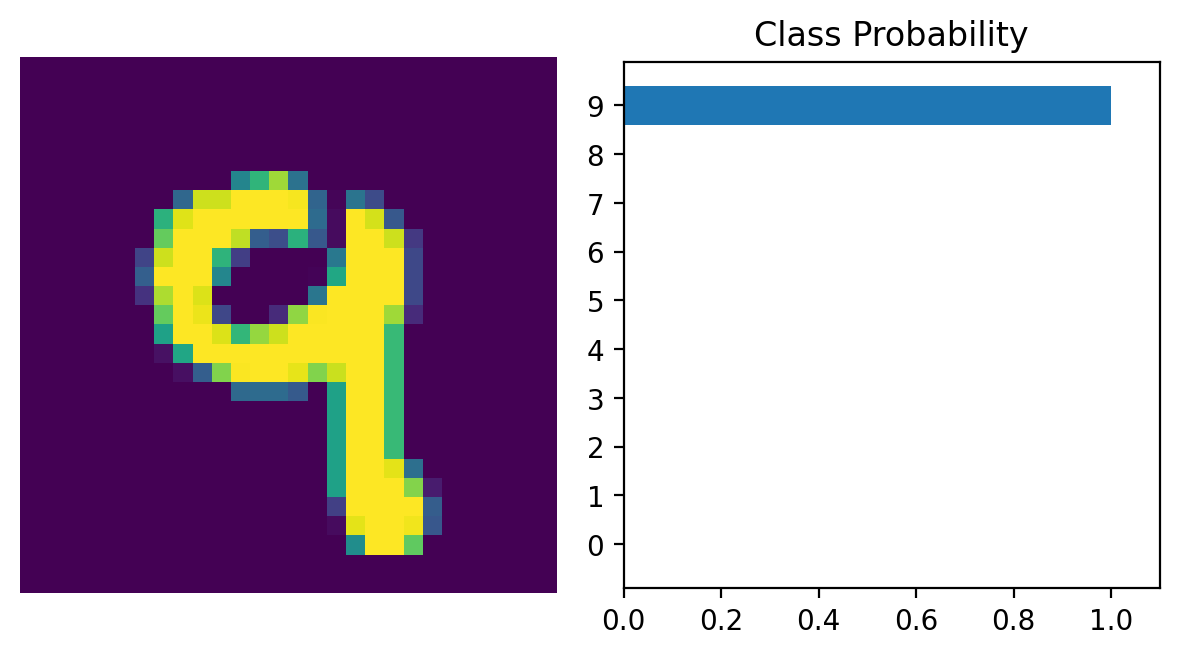

In [18]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

We will evaluate the model on the test dataset and visualize some predictions.


In [19]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9763


### Conclusion

In this notebook, we successfully built and trained a simple neural network using PyTorch to recognize handwritten digits. This introduction to PyTorch provides the foundation for more complex models and deeper exploration.


In [20]:
import numpy as np

# Create a 3D matrix with a dimension of size 1
matrix = np.array([[1, 2], [3, 4]])

print("Original matrix shape:", matrix.shape)  # Output: (1, 2, 2)

# Apply squeeze()
squeezed_matrix = matrix.squeeze()

print("Squeezed matrix shape:", squeezed_matrix.shape)  # Output: (2, 2)

Original matrix shape: (2, 2)
Squeezed matrix shape: (2, 2)
